In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
# download data

stock = 'ICICIBANK.NS'

data = yf.download(tickers=stock,interval='1d', period='5y')

[*********************100%%**********************]  1 of 1 completed


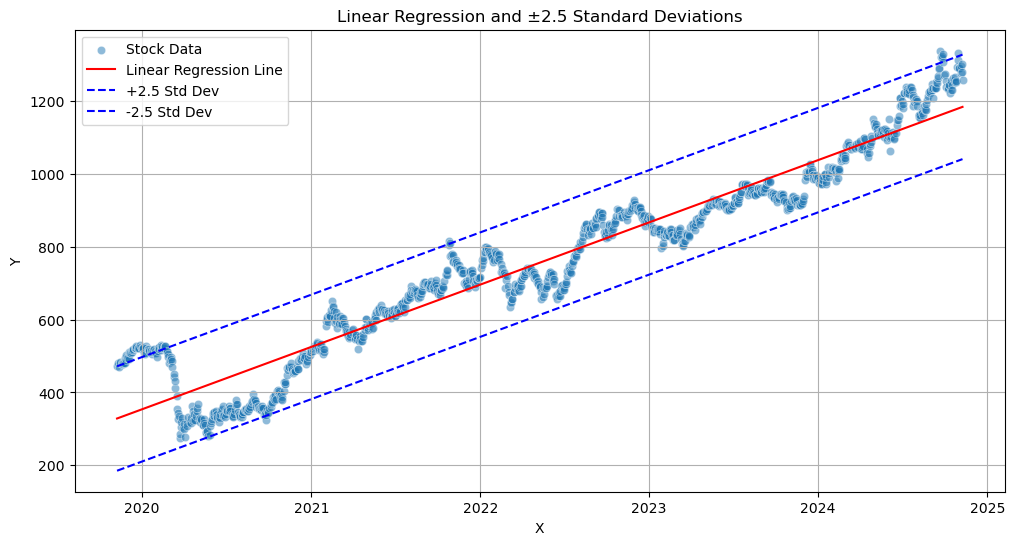

In [12]:
create_LR(data)

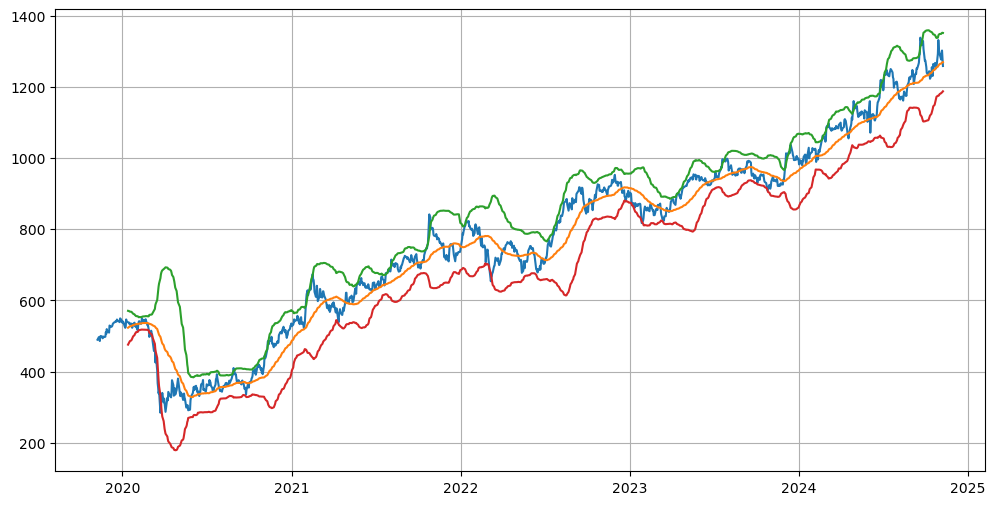

In [30]:
create_bb(data)

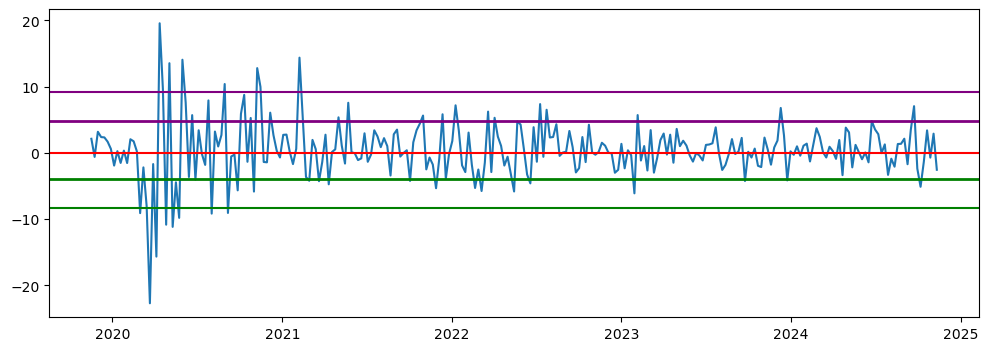

In [76]:
create_weekly_return(data)

In [28]:
def create_LR(df):
    y = np.array(data['Adj Close'])
    X = np.array(pd.to_datetime(data['Adj Close'].index).map(dt.datetime.toordinal))

    intercept, slope = np.polynomial.polynomial.polyfit(X, y, deg =1)
    regression_line = (slope * X + intercept)

    std_dev = np.std(y - regression_line)
    # std_dev = np.std(y)
    plus_2_std = regression_line + 2 * std_dev
    minus_2_std = regression_line - 2 * std_dev
    X = np.array(data.index)
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=X, y=y, label='Stock Data', alpha=0.5)
    plt.plot(X, regression_line, color='red', label='Linear Regression Line')
    plt.plot(X, plus_2_std, color='blue', linestyle='--', label='+2.5 Std Dev')
    plt.plot(X, minus_2_std, color='blue', linestyle='--', label='-2.5 Std Dev')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Linear Regression and ±2.5 Standard Deviations')
    plt.legend()
    plt.grid(True)
    return X, regression_line, plus_2_std, minus_2_std

In [29]:
def create_bb(data):
    data['rolling_mean'] = data['Close'].rolling(45).mean()
    data['rolling_std'] = data['Close'].rolling(45).std()
    data['2UP'] = data['rolling_mean'] + 2.5*data['rolling_std']
    data['2DOWN'] = data['rolling_mean'] - 2.5*data['rolling_std']
    plt.figure(figsize=(12,6))
    plt.plot(data['Close'])
    plt.plot(data['rolling_mean'])
    plt.plot(data['2UP'])
    plt.plot(data['2DOWN'])
    plt.grid(True)
    # return fig
    # plt.savefig(f"../BB/{ticker}.png")

In [75]:
def create_weekly_return(df):
    weekly_data = data['Close'].resample('W', label='left').ffill().pct_change()*100
    plt.figure(figsize=(12,4))
    plt.plot(weekly_data)
    plt.axhline(0, color = 'red')
    plt.axhline(np.mean(weekly_data) + np.std(weekly_data), color='purple', linewidth=2);
    plt.axhline(np.mean(weekly_data) - np.std(weekly_data), color='green', linewidth=2);
    plt.axhline(np.mean(weekly_data) + 2* np.std(weekly_data), color='purple');
    plt.axhline(np.mean(weekly_data) - 2*np.std(weekly_data), color='green')
    # return fig
    # plt.savefig(f"../MONTHLY_RETURN/{ticker}.png")